<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/classifcation_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import files
uploaded = files.upload()

Saving Logistic_X_Train.csv to Logistic_X_Train (2).csv
Saving Logistic_Y_Train.csv to Logistic_Y_Train (2).csv


In [62]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['Logistic_X_Train.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['Logistic_Y_Train.csv']))


In [63]:
df3

,label
0,0
1,0
2,1
3,0
4,1
...,...
2245,1
2246,1
2247,1
2248,1


In [68]:
import numpy as np
X = np.array(df2)
Y = np.array(df3)

print(X.shape)
print(Y.shape)

(2250, 2)
(2250, 1)


In [69]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.15, random_state=42,shuffle=True)

In [70]:
X_Train.shape
print(X_Test.shape)
print(Y_Test.shape)
print(X_Train.shape)
print(Y_Train.shape)

(338, 2)
(338, 1)
(1912, 2)
(1912, 1)


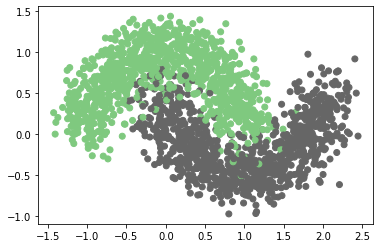

In [71]:
import matplotlib.pyplot as plt

plt.scatter(X_Train[:,0],X_Train[:,1],c=Y_Train,cmap=plt.cm.Accent)
plt.show()

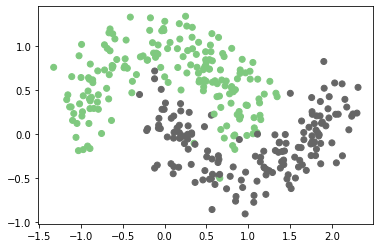

In [72]:
plt.scatter(X_Test[:,0],X_Test[:,1],c=Y_Test,cmap=plt.cm.Accent)
plt.show()

In [73]:
import keras
from keras import models
from keras.layers import Dense

In [74]:
model = models.Sequential()

In [75]:
model.add(Dense(5,activation='relu',input_shape=((2,))))

In [76]:
model.add(Dense(5,activation='relu'))

In [77]:
model.add(Dense(1,activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
history = model.fit(X_Train,Y_Train,epochs=20,validation_split=0.2,batch_size=32)

Epoch 1/20
48/48 [==============================] - 1s 5ms/step - loss: 0.7280 - accuracy: 0.2145 - val_loss: 0.7076 - val_accuracy: 0.2010
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.3564 - val_loss: 0.6793 - val_accuracy: 0.6580
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.8241 - val_loss: 0.6484 - val_accuracy: 0.8721
Epoch 4/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6305 - accuracy: 0.8659 - val_loss: 0.6115 - val_accuracy: 0.8616
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8358 - val_loss: 0.5639 - val_accuracy: 0.8460
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8234 - val_loss: 0.5064 - val_accuracy: 0.8460
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8260 - val_loss: 0.4517 - val_accuracy: 0.8512
Epoch 8/20
48/48 [==

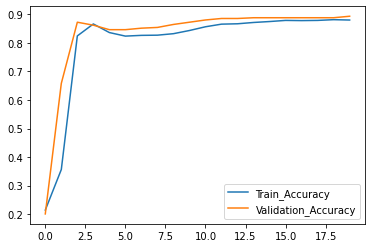

In [81]:
plt.plot(history.history['accuracy'],label="Train_Accuracy")
plt.plot(history.history['val_accuracy'],label = 'Validation_Accuracy')
plt.legend()
plt.show()


In [82]:
result = model.evaluate(X_Test,Y_Test)

11/11 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.8905


In [84]:
print("The model has accuarcy of {0}".format(result[1]))

The model has accuarcy of 0.8905325531959534


In [95]:
from google.colab import files
files.upload()

Saving visualize.py to visualize.py


{'visualize.py': b'import matplotlib.pyplot as plt\r\nimport numpy as np\r\n\r\ndef plot_decision_boundary(model, X, y,cmap=plt.cm.jet):\r\n    """\r\n    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding\r\n    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the \r\n    descion boundary.\r\n    Example usage:\r\n    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot\r\n    train set then call as:\r\n    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)\r\n    params(3): \r\n        model : a function which expectes the point to make 0/1 label prediction\r\n        X : a (mx2) numpy array with the points\r\n        y : a (mx1) numpy array with labels\r\n    outputs(None)\r\n    """\r\n    # Set min and max values and give it some padding\r\n    x_min, x_max = X[:, 0].min() - 1, 

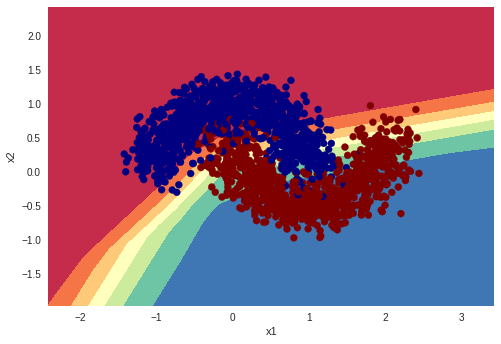

In [100]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X_Train,Y_Train)